In [1]:
import numpy as np
import pandas as pd

import os

import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.style as style 
import seaborn as sns
%matplotlib inline

import datetime as dt
from datetime import timedelta

import ciso8601

from termcolor import colored

from wordcloud import WordCloud, STOPWORDS

sns.set_style('darkgrid')
sns.set_context('paper')
style.use('ggplot')
matplotlib.rcParams['font.family'] = 'helvetica'
matplotlib.rcParams['figure.titlesize'] = 'large'

***Load submissions***

In [2]:
path = './submissions_scraped/'

files = []
for filename in os.listdir(path):
    files.append(pd.read_csv(os.path.join(path, filename)))
    
files = pd.concat(files)
df_submissions = pd.DataFrame(files)
df_submissions.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
df_submissions.head(3)

,title,author,score,id,subreddit,url,num_comments,body,created
0,Berberine,iserd,2,k4vtmp,UlcerativeColitis,https://www.reddit.com/r/UlcerativeColitis/com...,3,Hi all. I am in remission currently taking mes...,2020-12-01 23:30:39
1,Has anyone experienced this? Symptoms changing...,rachelcalabresi,2,k4vq6z,UlcerativeColitis,https://www.reddit.com/r/UlcerativeColitis/com...,5,I hope this message doesn’t upset anyone in th...,2020-12-01 23:26:03
2,[deleted by user],NaN,2,k4uvuj,UlcerativeColitis,NaN,5,[removed],2020-12-01 22:43:52


***Load comments***

In [4]:
df_comments = pd.read_csv('./comments_scraped/comments.csv')
df_comments.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df_comments.head(3)

,parent_id,author,score,id,subreddit,body,created
0,t3_k4xgh0,biljardbal,5,gebmqwv,CrohnsDisease,"I tried to make one like this, but it seems th...",2020-12-02 02:32:38
1,t3_k4xgh0,loonalady,5,geboap0,CrohnsDisease,"Confused why people are downvoting, is this of...",2020-12-02 02:47:01
2,t3_k4x6p1,cheetoPalmer,2,gebfaos,CrohnsDisease,"When I’m in the thick of it, the only thing I’...",2020-12-02 01:23:34


## Data Insights

In [6]:
subreddits = ['CrohnsDisease', 'IBD', 'UlcerativeColitis', 'ibs']
colors = ['#cc5a49', '#4586ac', '#9e97cc', '#777777']

df_crohns = df_submissions[df_submissions['subreddit'] == 'CrohnsDisease']
df_ibs = df_submissions[df_submissions['subreddit'] == 'ibs']
df_ibd = df_submissions[df_submissions['subreddit'] == 'IBD']
df_ulc = df_submissions[df_submissions['subreddit'] == 'UlcerativeColitis']

crohns_comments_scraped = df_comments[df_comments['subreddit'] == 'CrohnsDisease']['id'].count()
ulc_comments_scraped = df_comments[df_comments['subreddit'] == 'UlcerativeColitis']['id'].count()
ibs_comments_scraped = df_comments[df_comments['subreddit'] == 'ibs']['id'].count()
ibd_comments_scraped = df_comments[df_comments['subreddit'] == 'IBD']['id'].count()

In [7]:
print(colored('SUBMISSIONS\n', color='blue', attrs=['bold']))

print(f'\tNumber of subsmissions:\t\t{df_submissions.shape[0]}\n')
print(f'\tNumber of authors:\t\t{df_submissions.author.isnull().sum()}\n')

print(colored('COMMENTS\n', color='blue', attrs=['bold']))

print(f'\tNumber of comments:\t\t{df_comments.shape[0]}\n')

print(colored('SUBREDDITS\n', color='blue', attrs=['bold']))
print(f'\tSubreddits scraped: \t{subreddits}\n')

print(colored('\tr/CrohnsDisease\n', color='blue'))
print(f'\t\tNumber of submissions:\t{df_crohns.shape[0]}\n')
print(f'\t\tNumber of comments:\t{df_crohns.num_comments.sum()}\n')
print(f'\t\tComments scareped:\t{crohns_comments_scraped}\n')

print(colored('\tr/UlcerativeColitis\n', color='blue'))
print(f'\t\tNumber of submissions:\t{df_ulc.shape[0]}\n')
print(f'\t\tNumber of comments:\t{df_ulc.num_comments.sum()}\n')
print(f'\t\tComments scareped:\t{ulc_comments_scraped}\n')

print(colored('\tr/ibs\n', color='blue'))
print(f'\t\tNumber of submissions:\t{df_ibs.shape[0]}\n')
print(f'\t\tNumber of comments:\t{df_ibs.num_comments.sum()}\n')
print(f'\t\tComments scareped:\t{ibs_comments_scraped}\n')

print(colored('\tr/IBD\n', color='blue'))
print(f'\t\tNumber of submissions:\t{df_ibd.shape[0]}\n')
print(f'\t\tNumber of comments:\t{df_ibd.num_comments.sum()}\n')
print(f'\t\tComments scareped:\t{ibd_comments_scraped}\n')

print(colored('EMPTY VALUES SUBMISSIONS\n', color='blue', attrs=['bold']))
print(df_submissions.isnull().sum().sort_values(ascending = False), '\n')

print(colored('EMPTY VALUES COMMENTS\n', color='blue', attrs=['bold']))
print(df_comments.isnull().sum().sort_values(ascending = False), '\n')

SUBMISSIONS

	Number of subsmissions:		78646

	Number of authors:		22294

COMMENTS

	Number of comments:		347556

SUBREDDITS

	Subreddits scraped: 	['CrohnsDisease', 'IBD', 'UlcerativeColitis', 'ibs']

	r/CrohnsDisease

		Number of submissions:	21475

		Number of comments:	224886

		Comments scareped:	119197

	r/UlcerativeColitis

		Number of submissions:	16680

		Number of comments:	155694

		Comments scareped:	82352

	r/ibs

		Number of submissions:	36583

		Number of comments:	285211

		Comments scareped:	130085

	r/IBD

		Number of submissions:	3908

		Number of comments:	30980

		Comments scareped:	15922

EMPTY VALUES SUBMISSIONS

author          22294
url             20066
body             9075
title               0
score               0
id                  0
subreddit           0
num_comments        0
created             0
dtype: int64 

EMPTY VALUES COMMENTS

author       15704
parent_id        0
score            0
id               0
subreddit        0
body             0
create

## Data Visualization

***Comparing subreddits***

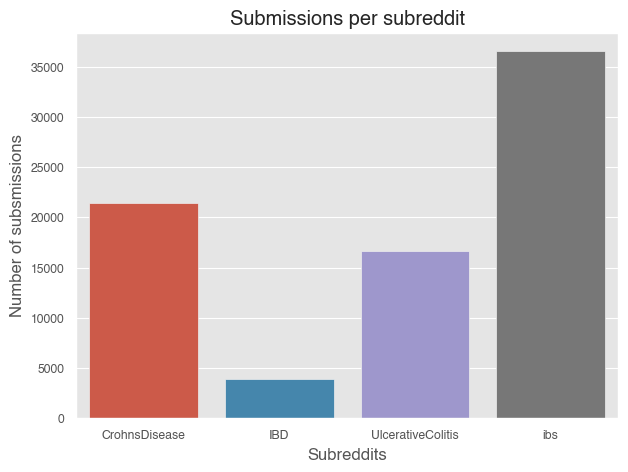

In [8]:
plt.figure(figsize=(7,5))

sns.barplot(x=subreddits, y=df_submissions.subreddit.value_counts().sort_index())
plt.title('Submissions per subreddit')
plt.ylabel('Number of subsmissions')
plt.xlabel('Subreddits')

plt.show()

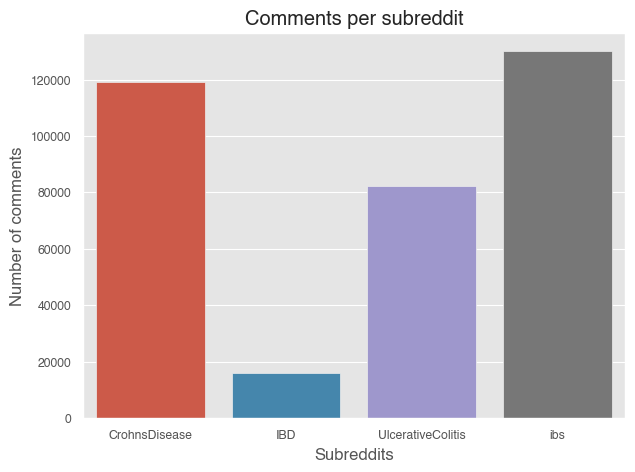

In [9]:
plt.figure(figsize=(7,5))

sns.barplot(x=subreddits, y=df_comments.groupby('subreddit')['id'].count().sort_index())

plt.title('Comments per subreddit')
plt.ylabel('Number of comments')
plt.xlabel('Subreddits')

plt.show();

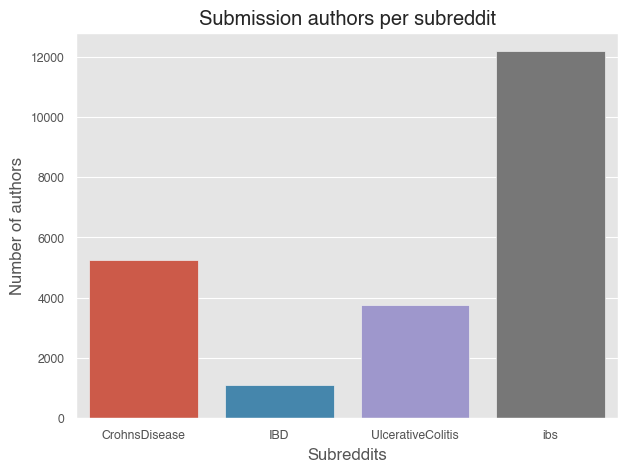

In [10]:
unique_authors = [df_crohns.author.isnull().sum(), df_ibd.author.isnull().sum(),
                 df_ulc.author.isnull().sum(), df_ibs.author.isnull().sum()]

plt.figure(figsize=(7,5))

sns.barplot(x=subreddits, y=unique_authors)

plt.title('Submission authors per subreddit')
plt.ylabel('Number of authors')
plt.xlabel('Subreddits')

plt.show();

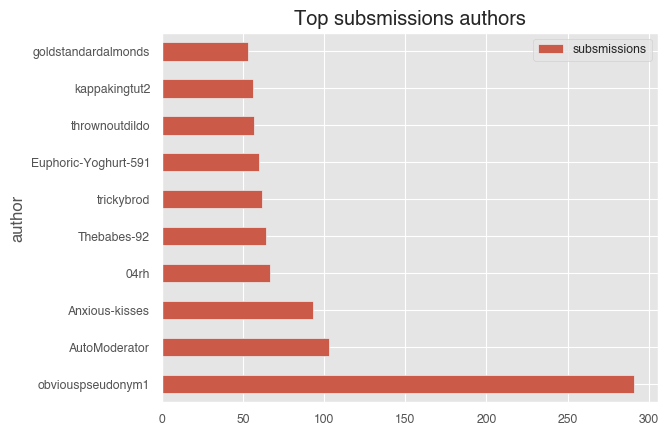

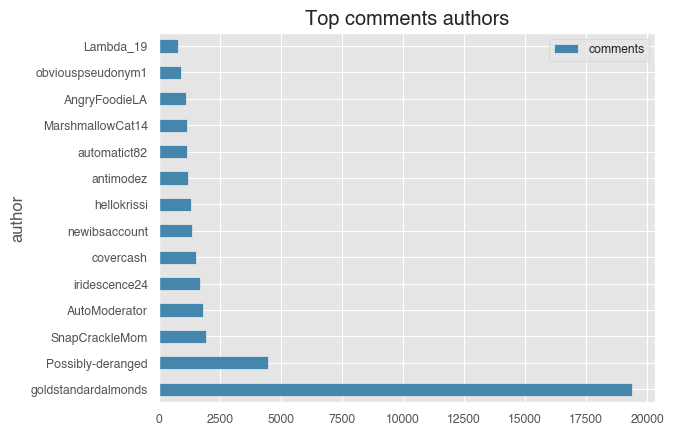

In [11]:
rank_submissions = df_submissions[['author', 'body']].groupby('author').count().sort_values('body', ascending=False)
rank_submissions.columns = ["count"]
rank_submissions = rank_submissions[rank_submissions['count'] > 50]
rank_submissions.rename(columns={'count': 'subsmissions'}, inplace=True)

rank_comments = df_comments[['author', 'body']].groupby('author').count().sort_values('body', ascending=False)
rank_comments.columns = ['count']
rank_comments = rank_comments[rank_comments['count'] > 700]
rank_comments.rename(columns={'count': 'comments'}, inplace=True)

rank_submissions.plot(
    color=colors[0],
    kind='barh',
    title='Top subsmissions authors',
    grid=True);

rank_comments.plot(
    color=colors[1],
    kind='barh',
    title='Top comments authors',
    grid=True);

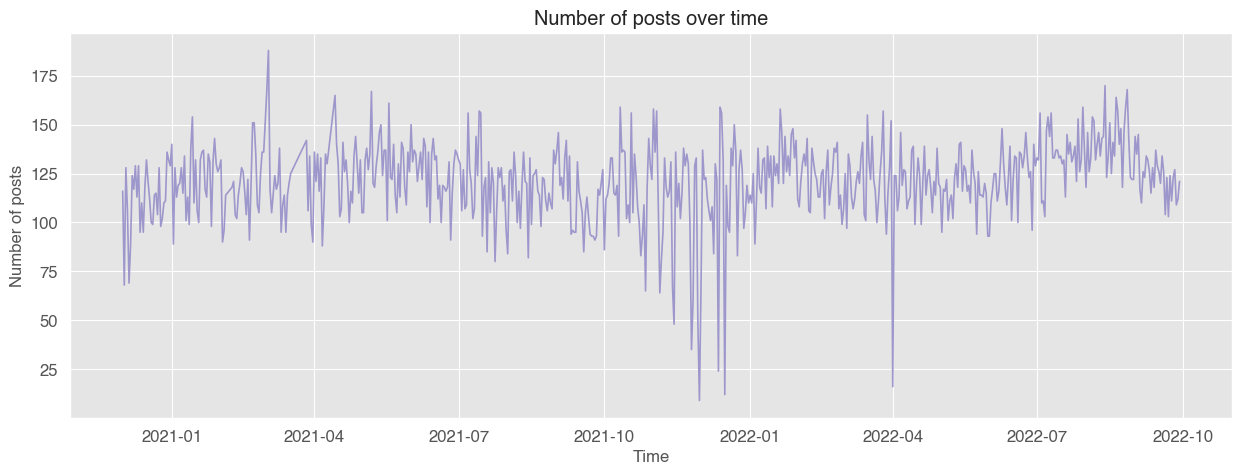

In [12]:
dates_df = df_submissions.astype({'created': 'datetime64[D]'})
dates = df_submissions.astype({"created":"datetime64[D]"}).created.unique()
posts_per_day = dates_df.groupby(['created'])['id'].count()

plt.figure(figsize=(15,5))
plt.title('Number of posts over time')
sns.lineplot(x=dates, y=posts_per_day, color=colors[2])

plt.ylabel('Number of posts')
plt.xlabel('Time')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [13]:
date_start = dt.datetime.strptime(df_submissions.created.min(), '%Y-%m-%d %H:%M:%S')
date_end = dt.datetime.strptime(df_submissions.created.max(), '%Y-%m-%d %H:%M:%S')
date_start = '{:%Y-%m-%d}'.format(date_start)
date_end = '{:%Y-%m-%d}'.format(date_end)

date_start = dt.datetime.strptime(date_start, '%Y-%m-%d')
date_end = dt.datetime.strptime(date_end, '%Y-%m-%d')

dd = [date_start + timedelta(days=x) for x in range((date_end - date_start).days + 1)]
dates = pd.DataFrame(dd,columns=['date'])
dates.date = dates.date.astype('datetime64[ns]')

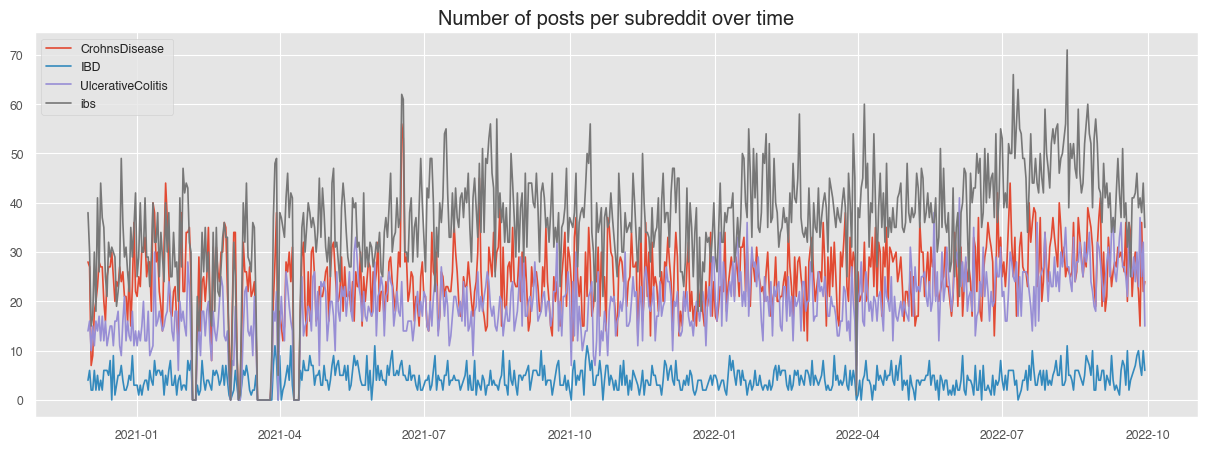

In [14]:
posts = df_submissions.astype({"created":"datetime64[D]"})

crohn = posts[posts.subreddit == 'CrohnsDisease'].groupby('created').count().rename(columns={'author': 'CrohnsDisease'}).reset_index()[['CrohnsDisease', 'created']]
ibd = posts[posts.subreddit == 'IBD'].groupby('created').count().rename(columns={'author': 'IBD'}).reset_index()[['IBD', 'created']]
ulc = posts[posts.subreddit == 'UlcerativeColitis'].groupby('created').count().rename(columns={'author': 'UlcerativeColitis'}).reset_index()[['UlcerativeColitis', 'created']]
ibs = posts[posts.subreddit == 'ibs'].groupby('created').count().rename(columns={'author': 'ibs'}).reset_index()[['ibs', 'created']]

posts_over_time = ibs.merge(ulc.merge(crohn.merge(ibd, on='created', how='outer'), on='created', how='outer'), on='created', how='outer')
posts_over_time = posts_over_time.merge(dates, left_on="created", right_on="date", how="right")
posts_over_time = posts_over_time.fillna(0)

posts_over_time.index = posts_over_time['created']
posts_over_time = posts_over_time.drop(columns=['created'])
posts_over_time = posts_over_time.reset_index()

plt.figure(figsize=(15, 5))
plt.title('Number of posts per subreddit over time')
plt.plot(posts_over_time.date, posts_over_time[subreddits], label=subreddits);
plt.legend();
plt.show();

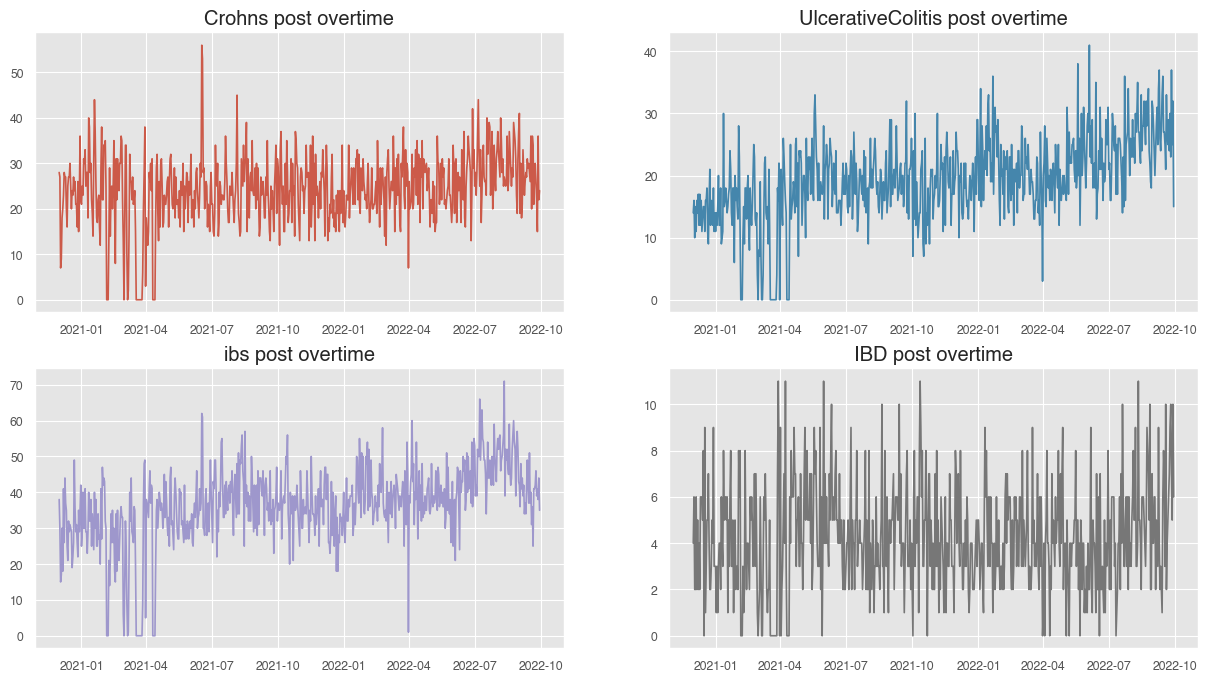

In [15]:
plt.figure(figsize=(15, 8))

# Plot 1
plt.subplot(2, 2, 1)
plt.title('Crohns post overtime')
plt.plot(posts_over_time.date, posts_over_time[['CrohnsDisease']], color=colors[0])

# Plot 2
plt.subplot(2, 2, 2)
plt.title('UlcerativeColitis post overtime')
plt.plot(posts_over_time.date, posts_over_time[['UlcerativeColitis']], color=colors[1])

# Plot 3
plt.subplot(2, 2, 3)
plt.title('ibs post overtime')
plt.plot(posts_over_time.date, posts_over_time[['ibs']], color=colors[2])

# Plot 4
plt.subplot(2, 2, 4)
plt.title('IBD post overtime')
plt.plot(posts_over_time.date, posts_over_time[['IBD']], color=colors[3])

plt.show();

## WORDCLOUDS

In [16]:
df = pd.concat([df_submissions, df_comments])
df.body.fillna('', inplace=True)

In [17]:
posts_bodies = df[df['body'] != '']

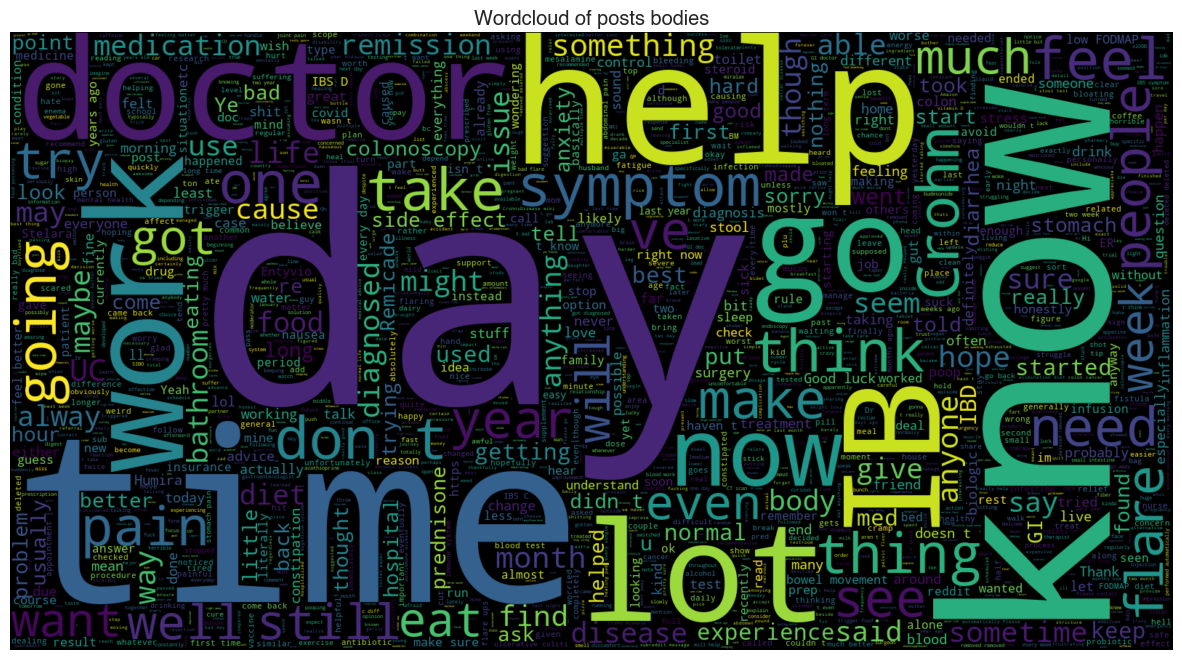

In [18]:
STOPWORDS.add('m')
STOPWORDS.add('s')

plt.figure(figsize=(15,15))
plt.title('Wordcloud of posts bodies')
word_cloud = WordCloud(min_font_size=3, max_words=1600, width=1600, height=850, stopwords=STOPWORDS).generate(str(" ".join(posts_bodies.body)))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off');

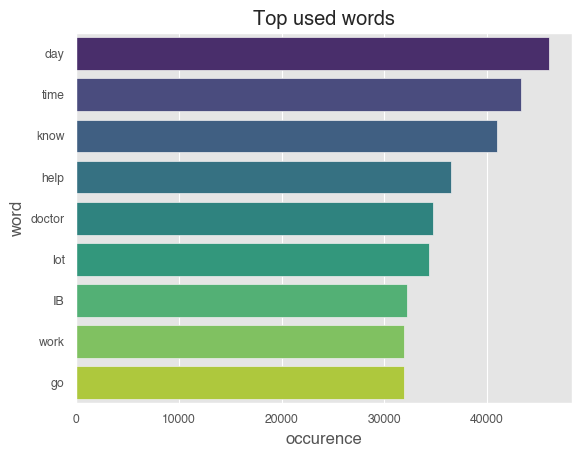

In [19]:
words_count = word_cloud.process_text(str(" ".join(posts_bodies['body'])))
sorted_words_count = sorted(words_count.items(), key = lambda kv:(kv[1], kv[0]))

top_words = []
for i in range(1, 10):
    top_words.append(sorted_words_count[-i])

plt.title('Top used words')
top_words = pd.DataFrame(top_words, columns=['word', 'occurence'])
sns.barplot(y=top_words.word, x=top_words.occurence, palette='viridis', orient='h');

## COVID FILTERING

In [20]:
covid_keywords = [
    "Pandemic",
    "pandemic",
    "coronavirus" ,
    "CORONAVIRUS",
    "Coronavirus",
    "COVID-19",
    "COVID19",
    "COVID",
    "COVID 19",
    "covid-19",
    "covid19",
    "covid",
    "covid 19",
    "Covid-19",
    "Covid19",
    "Covid",
    "Covid 19",
    "Vaccine",
    "vaccine"
    "SARS-COV-2","SARS COV-2","SARS-COV2","SARS-COV 2","SARS COV"
]

In [21]:
def find_keyword(post):
    if(np.any(np.array([post.find(K) for K in covid_keywords])>=0)):
        return True
    else:
        return False

In [22]:
df_filtered_covid = df[[find_keyword(p) for p in df.body]]
df_filtered_not_covid = df[[not find_keyword(p) for p in df.body]]

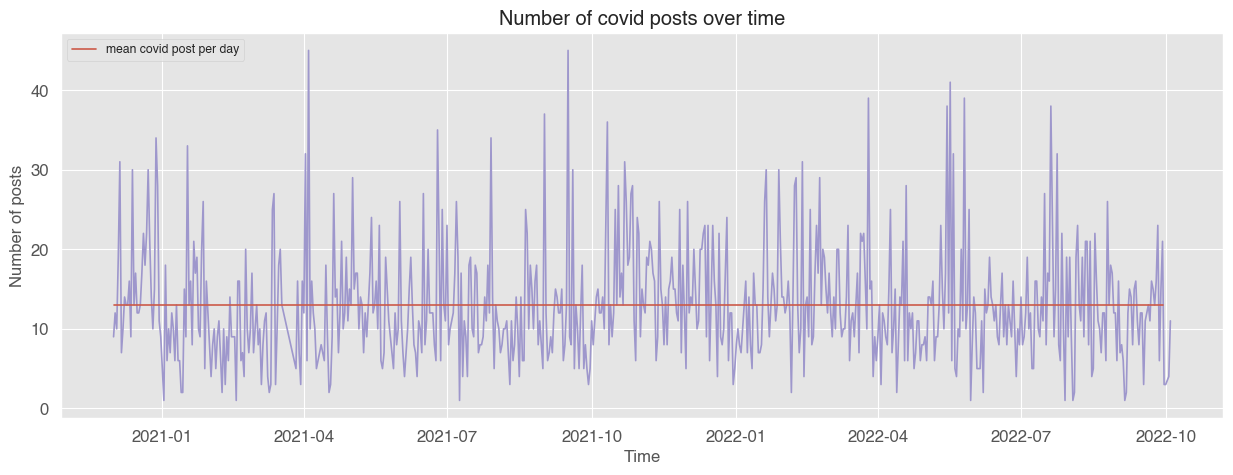

In [24]:
dates_df_cov = df_filtered_covid.astype({'created': 'datetime64[D]'})
dates_cov = df_filtered_covid.astype({"created":"datetime64[D]"}).created.unique()
covid_posts_per_day = dates_df_cov.groupby(['created'])['id'].count()

plt.figure(figsize=(15,5))
plt.title('Number of covid posts over time')
sns.lineplot(x=dates_cov, y=covid_posts_per_day, color=colors[2])
plt.plot(dates, covid_posts_per_day.mean().repeat(len(dates)), color=colors[0], label='mean covid post per day')

plt.ylabel('Number of posts')
plt.xlabel('Time')
plt.legend(loc='upper left')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
cov_posts = df_filtered_covid.astype({"created":"datetime64[D]"})

crohn = cov_posts[cov_posts.subreddit == 'CrohnsDisease'].groupby('created').count().rename(columns={'author': 'CrohnsDisease'}).reset_index()[['CrohnsDisease', 'created']]
ibd = cov_posts[cov_posts.subreddit == 'IBD'].groupby('created').count().rename(columns={'author': 'IBD'}).reset_index()[['IBD', 'created']]
ulc = cov_posts[cov_posts.subreddit == 'UlcerativeColitis'].groupby('created').count().rename(columns={'author': 'UlcerativeColitis'}).reset_index()[['UlcerativeColitis', 'created']]
ibs = cov_posts[cov_posts.subreddit == 'ibs'].groupby('created').count().rename(columns={'author': 'ibs'}).reset_index()[['ibs', 'created']]

cov_posts_over_time = ibs.merge(ulc.merge(crohn.merge(ibd, on='created', how='outer'), on='created', how='outer'), on='created', how='outer')
cov_posts_over_time = posts_over_time.merge(dates, left_on="created", right_on="date", how="right")
cov_posts_over_time = posts_over_time.fillna(0)

cov_posts_over_time.index = posts_over_time['created']
cov_posts_over_time = posts_over_time.drop(columns=['created'])
cov_posts_over_time = posts_over_time.reset_index()

plt.figure(figsize=(15, 5))
plt.title('Number of posts per subreddit over time')
plt.plot(posts_over_time.date, cov_posts_over_time[subreddits], label=subreddits);
plt.legend();
plt.show();

In [ ]:
plt.figure(figsize=(15, 8))

# Plot 1
plt.subplot(2, 2, 1)
plt.title('Covid posts in CrohnsDisease subreddit overtime')
plt.plot(covid_posts_over_time.date, covid_posts_over_time[['CrohnsDisease']], color=colors[0])

# Plot 2
plt.subplot(2, 2, 2)
plt.title('Covid posts in UlcerativeColitis subreddit overtime')
plt.plot(covid_posts_over_time.date, covid_posts_over_time[['UlcerativeColitis']], color=colors[1])

# Plot 3
plt.subplot(2, 2, 3)
plt.title('Covid posts in UlcerativeColitis subreddit overtime')
plt.plot(covid_posts_over_time.date, covid_posts_over_time[['ibs']], color=colors[2])

# Plot 4
plt.subplot(2, 2, 4)
plt.title('IBD post overtime')
plt.plot(covid_posts_over_time.date, covid_posts_over_time[['IBD']], color=colors[3])

plt.show();

In [ ]:
ax = covid_posts_over_time[['CrohnsDisease', 'IBD', 'UlcerativeColitis', 'ibs', 'date']].plot.area(
    title="Distribution of daily COVID messagges for subreddit",
    x="date",
    color=colors,
    figsize=(16,6),
    alpha=0.7,
)

plt.show();

In [ ]:
plt.figure(figsize=(15,15))
plt.title('Wordcloud of posts bodies')
word_cloud_covid = WordCloud(min_font_size=3, max_words=1600, width=1600, height=850, stopwords=STOPWORDS).generate(str(" ".join(df_filtered_covid.body)))
plt.imshow(word_cloud_covid, interpolation='bilinear')
plt.axis('off');

In [ ]:
covid_posts_over_time

In [ ]:
# TODO: Check if works
def clean_text(text):  
    pat1 = r'@[^ ]+'                   # @signs and value
    pat2 = r'https?://[A-Za-z0-9./]+'  # links
    pat3 = r'\'s'                      # floating s's
    pat4 = r'\#\w+'                    # hashtags and value
    pat5 = r'&amp '
    pat6 = r'[^A-Za-z\s]'              # remove non-alphabet
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5, pat6))
    text = re.sub(combined_pat,"",text).lower()
    return text.strip()